Muhammad Ahmed 

mahme045@gold.ac.uk

Goldsmiths, University of London

Machine Learning

# Coursework I

This notebook describes the first part of the ML coursework (code).  This part builds on work that you have already done during the labs.  The purpose of this coursework, along with the previous lab work, is to:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- CW based on work that you did in the lab - don't use libraries that implement kNN or cross-validation.  We want to see your code!
- For more details, read the coursework PDF on learn.gold

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import numpy as np
import math

iris = load_iris()
X, y = iris.data, iris.target
mySeed=1234567
options = [list(range(1, 11)), ['euclidean', 'manhattan']]

## 1. Exploratory Data Analysis

In Lab 2, we discussed how the first part of tackling an ML problem is visualization, in order to understand some of the properties of the problem at-hand.  In the same lab, you were asked to reproduce a figure that plots pairs of features used in our problem.  Fill-in the code you used to plot this figure from Lab 2 in the cell below.  

You should create a function that given data X and labels y plots the 4x4 grid.  The function should be invoked as
    
    myplotGrid(X,y)
    
where X is your training data and y are the labels

In [3]:
def myplotGrid(X,y):
    fig = plt.figure(figsize=(13,13))
    count = 0
    for i in range(4):
        for j in range(4):
            count += 1
            
            if i == j:
                ax = fig.add_subplot(4,4,count)
                ax.hist(X[:, i])

            else:
                ax = fig.add_subplot(4,4,count)
                ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Paired)

### 1.1. Exploratory Data Analysis 

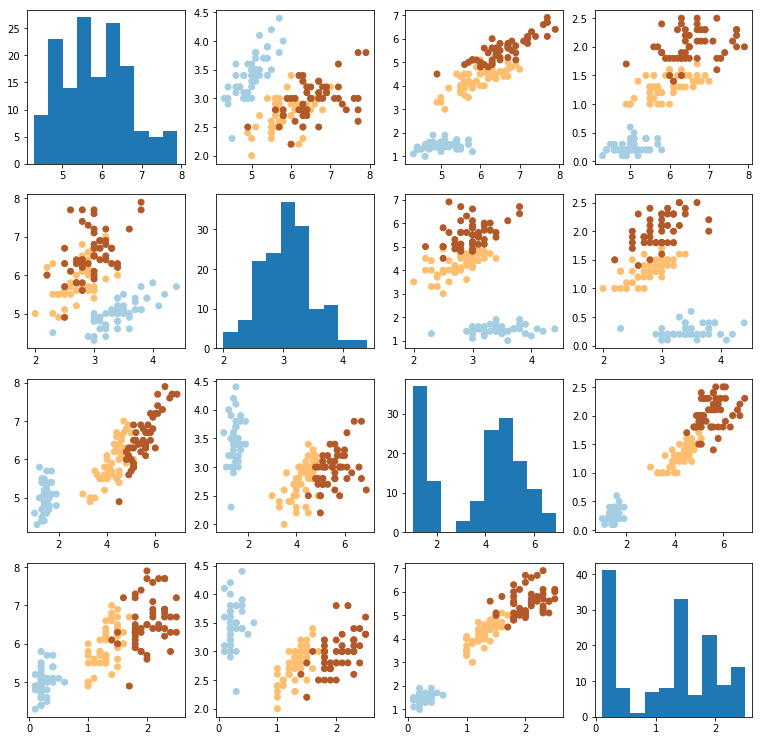

In [4]:
myplotGrid(X,y)
plt.show()

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,


    np.random.seed(mySeed) # initialize random seed to replicate results over different runs
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

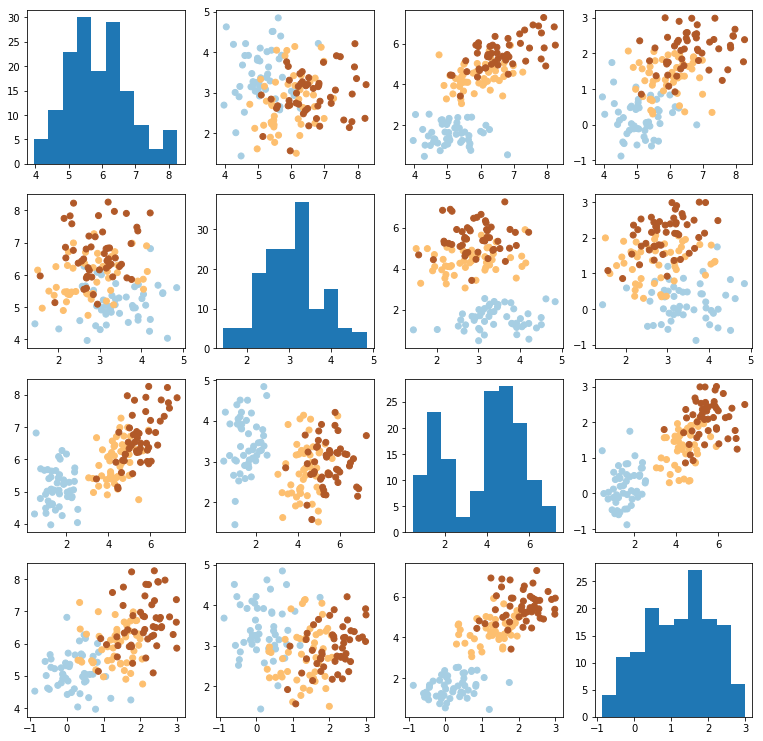

In [5]:
np.random.seed(mySeed)
XN=X+np.random.normal(0,0.5,X.shape)

myplotGrid(XN,y)
plt.show()

### 1.3 Alternate Seaborn Example Exploratory Data Analysis
Here I will be demonstrating an extra similar pairplot grid using Seaborn

/Users/chxon/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


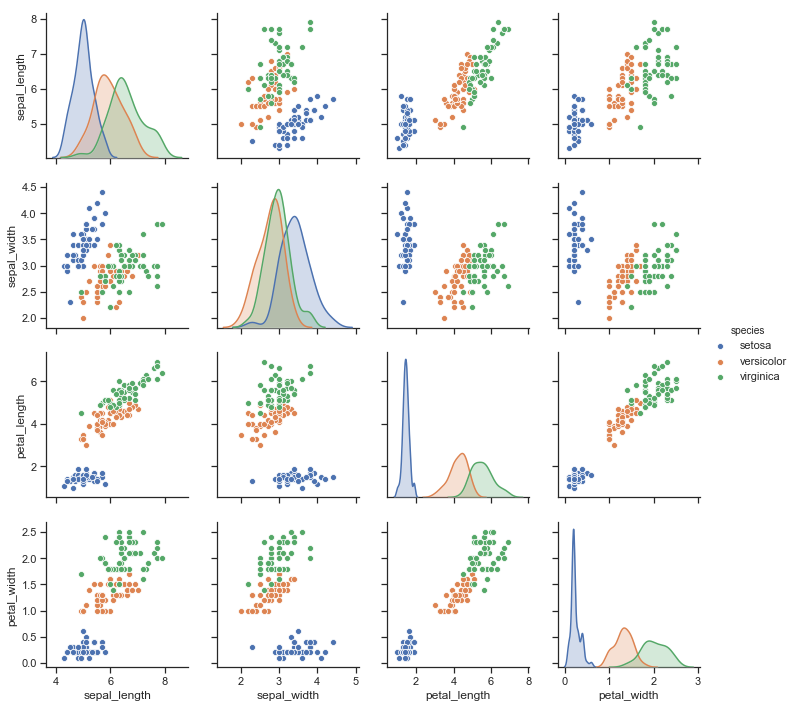

In [6]:
sns.set(style="ticks")
iris_sns = sns.load_dataset("iris")
sns_pairplot_grid = sns.pairplot(iris_sns, hue="species")

sns_pairplot_grid 

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You are guided to do this by following the notebook in Lab 4.  Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

In [7]:
def myConfMat(y_test,y_pred):
    xy = len(np.unique(y_test))
    CM = np.zeros((xy, xy), dtype=int)
    for i in range(len(y_test)):
        if y_pred[i] == y_test[i]:
            CM[y_test[i], y_pred[i]] += 1
        elif y_pred[i] != y_test[i]:
            CM[y_test[i], y_pred[i]] += 1
    return CM

def myAccuracy(y_test,y_pred):
    arrayCorrect = np.where(y_pred==y_test)
    totalCorrect = len(arrayCorrect[0])
    total = len(y_test) 
    accuracy = (totalCorrect/total) *100
    return accuracy    

def euclideanDistance(in1, in2):
    sum = 0
    for x, y in zip(in1, in2):
        sum += (x-y)**2
    return math.sqrt(sum)

def manhattanDistance(in1, in2):
    sum = 0
    for x, y in zip(in1, in2):
        sum += abs(x - y)
    return sum

def getNeighbours(x_, X, n, T, distF):
    dists = []
    if distF == "euclidean":
        for i in range(0, T):
            dist = euclideanDistance(x_, X[i])
            dists.append(dist)
    elif distF == "manhattan":
        for i in range(0, T):
            dist = manhattanDistance(x_, X[i])
            dists.append(dist)    
    
    b = np.array(dists)
    c = b.argsort()
    return c[:n]

def assignLabel(neighbours, targets): 
    classCount = {}
    for x in neighbours:
        if targets[x] in classCount:
            classCount[targets[x]] += 1
        else:
            classCount[targets[x]] = 1
    return max(classCount, key = classCount.get)

def myKNN(X, y, x_, options):
    nt = len(X)
    predicted = []
    for i in range(0, len(x_)):
        a = getNeighbours(x_[i], X, options[0], nt, options[1]) 
        predicted.append(assignLabel(a, y))
    return predicted

## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above.  Again, you are guided to complete this task by following the appropriate notebook in Lab 4.  Your code for nested cross-validation should invoke your kNN function (see above).  You cross validation function should be invoked similary to:

    accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate at least two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each fold, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [8]:
def myNestedCrossVal(X,y,foldK,nns,dists,mySeed):
    accuracy_fold=[]
    indices= np.random.permutation(list(range(X.shape[0]))) 
    bins=np.array_split(indices, foldK)
    confmat_total = []
    for i in range(foldK):
        print("Fold:%s" %i)
        foldTrain = []
        foldTest = []
        foldVal = []
        bins_without_test = bins[:i] + bins[(i+1):]
        for j in range(len(bins_without_test)):
            foldTrain += bins_without_test[j].tolist()
        foldTest = bins[i].tolist()
        
        
        training_bins=np.array_split(foldTrain, foldK)

        for k in range(foldK):          
            foldTrain=[]
            foldVal =[]
            bins_without_val = training_bins[:k] + training_bins[(k+1):]
            for l in range(len(bins_without_val)):
                foldTrain += bins_without_val[l].tolist()
            foldVal = training_bins[k].tolist()

        
        bestDistance='' 
        bestNN=-1 
        bestAccuracy=-10
        for m in range(0, len(dists)):
            for n in range(0, len(nns)):
                val_pred = myKNN(X[foldTrain], y[foldTrain], X[foldVal],[nns[n], dists[m]])
                acs = myAccuracy(y[foldVal],val_pred)
                if acs > bestAccuracy:
                    bestDistance = dists[m]
                    bestNN = nns[n]
                    bestAccuracy = acs
        foldTrain = foldTrain +foldVal        
        y_pred = myKNN(X[foldTrain], y[foldTrain], X[foldTest],[bestNN, bestDistance]) 
        acs = myAccuracy(y[foldTest],y_pred)
        confmat = myConfMat(y[foldTest], y_pred)
        print(confmat)
        print("bestAccuracy:%s" %acs)
        print("\t")
        print("bestDistance:%s" %bestDistance)
        print("\t")
        print("bestNN:%s" %bestNN)
        print("\n")
        accuracy_fold.append(acs)
        confmat_total.append(confmat)
        

    lcm = len(confmat_total[0])
    cmt=np.zeros((lcm, lcm), dtype=int)
    
    for i in range(0, len(confmat_total)):
        cmt += confmat_total[i]
        
    print("Total Confusion Matrix:","\n", cmt)  
    return accuracy_fold;



### 4.1 Clean Data Run

In [9]:
accuracy_fold = myNestedCrossVal(X, y, 5, options[0] ,options[1],mySeed)
print("\naccuracy_fold:%s" %accuracy_fold)
#print("mean:%s" %np.mean(accuracy_fold))
#print("std:%s" %np.std(accuracy_fold))


Fold:0
[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
bestAccuracy:96.66666666666667
	
bestDistance:euclidean
	
bestNN:3


Fold:1
[[ 7  0  0]
 [ 0 12  0]
 [ 0  0 11]]
bestAccuracy:100.0
	
bestDistance:euclidean
	
bestNN:5


Fold:2
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
bestAccuracy:100.0
	
bestDistance:euclidean
	
bestNN:5


Fold:3
[[10  0  0]
 [ 0  6  1]
 [ 0  1 12]]
bestAccuracy:93.33333333333333
	
bestDistance:euclidean
	
bestNN:3


Fold:4
[[12  0  0]
 [ 0 10  1]
 [ 0  0  7]]
bestAccuracy:96.66666666666667
	
bestDistance:euclidean
	
bestNN:5


Total Confusion Matrix: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

accuracy_fold:[96.66666666666667, 100.0, 100.0, 93.33333333333333, 96.66666666666667]


### 4.2 Noisy Data Run

In [10]:
accuracy_fold_noisy = myNestedCrossVal(XN, y, 5, options[0] ,options[1],mySeed)
print("\naccuracy_fold_noisy:%s" %accuracy_fold_noisy)

#print("mean:%s" %np.mean(accuracy_fold_noisy))
#print("std:%s" %np.std(accuracy_fold_noisy))

Fold:0
[[9 0 0]
 [0 9 6]
 [0 0 6]]
bestAccuracy:80.0
	
bestDistance:manhattan
	
bestNN:9


Fold:1
[[10  0  0]
 [ 0  9  3]
 [ 0  1  7]]
bestAccuracy:86.66666666666667
	
bestDistance:euclidean
	
bestNN:3


Fold:2
[[10  0  0]
 [ 0  7  0]
 [ 0  5  8]]
bestAccuracy:83.33333333333334
	
bestDistance:euclidean
	
bestNN:7


Fold:3
[[14  0  0]
 [ 0  6  2]
 [ 0  1  7]]
bestAccuracy:90.0
	
bestDistance:euclidean
	
bestNN:5


Fold:4
[[ 7  0  0]
 [ 0  7  1]
 [ 0  4 11]]
bestAccuracy:83.33333333333334
	
bestDistance:euclidean
	
bestNN:3


Total Confusion Matrix: 
 [[50  0  0]
 [ 0 38 12]
 [ 0 11 39]]

accuracy_fold_noisy:[80.0, 86.66666666666667, 83.33333333333334, 90.0, 83.33333333333334]
mean:84.66666666666667
std:3.3993463423951886
